In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [25]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.metrics import mean_absolute_error

In [3]:
# https://archive.ics.uci.edu/ml/datasets/Auto+MPG

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

df = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)

In [4]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
df.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [5]:
df = df.dropna()

In [ ]:
df.shape

(392, 8)

In [ ]:
df['Origin'].value_counts()

1    245
3     79
2     68
Name: Origin, dtype: int64

In [ ]:
df.dtypes

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight          float64
Acceleration    float64
Model Year        int64
Origin            int64
dtype: object

In [6]:
X = df.drop(['MPG'], axis=1)
y = df['MPG']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((313, 7), (79, 7), (313,), (79,))

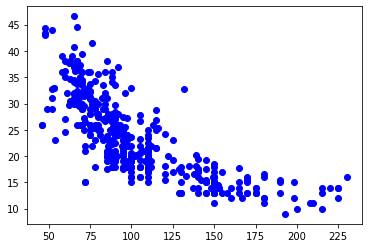

In [ ]:
plt.scatter(df['Horsepower'], df['MPG'], color='b')

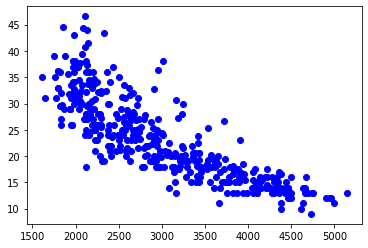

In [ ]:
plt.scatter(df['Weight'], df['MPG'], color='b')

In [11]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler(feature_range = (0, 1)).fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)

In [21]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [22]:
loss = keras.losses.MeanAbsoluteError()
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss = loss, optimizer = optimizer)

In [23]:
model.fit(X_train_norm, y_train, epochs=50, verbose=1, validation_split = 0.2)

Epoch 1/50
8/8 [==============================] - 1s 26ms/step - loss: 23.5235 - val_loss: 22.1406
Epoch 2/50
8/8 [==============================] - 0s 6ms/step - loss: 23.0591 - val_loss: 21.6121
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 22.5167 - val_loss: 20.9669
Epoch 4/50
8/8 [==============================] - 0s 6ms/step - loss: 21.8329 - val_loss: 20.1181
Epoch 5/50
8/8 [==============================] - 0s 6ms/step - loss: 20.9258 - val_loss: 18.9952
Epoch 6/50
8/8 [==============================] - 0s 7ms/step - loss: 19.7141 - val_loss: 17.4884
Epoch 7/50
8/8 [==============================] - 0s 6ms/step - loss: 18.0777 - val_loss: 15.4631
Epoch 8/50
8/8 [==============================] - 0s 5ms/step - loss: 15.9041 - val_loss: 12.9285
Epoch 9/50
8/8 [==============================] - 0s 5ms/step - loss: 13.2756 - val_loss: 10.4199
Epoch 10/50
8/8 [==============================] - 0s 5ms/step - loss: 10.9695 - val_loss: 8.5552
Epoch 11/50
8/8 [==

In [27]:
model.evaluate(X_test_norm, y_test, verbose=1)

3/3 [==============================] - 0s 5ms/step - loss: 2.4401


2.4401326179504395

In [24]:
y_preds = model.predict(X_test_norm)

In [26]:
loss = mean_absolute_error(y_preds, y_test)
print(loss)

2.4401326336438145
